In [1]:
import pandas as pd
import numpy as np

In [2]:
per = (1, )
per

(1,)

In [5]:
per += (2, )
per

(1, 2)

In [9]:
def get_data_fig(*args, **kwargs):
    per = (sum(args), )
    for type in ['type', 'color', 'closed', 'width']:
        if type in kwargs:
            per += (kwargs[type], )
    
    return per

In [10]:
a = get_data_fig(1, 2, 3, 4, type='mine', closed=True, color=123)
a

(10, 'mine', 123, True)

In [34]:
a = [[1, 0, 0, 0, 0], [0, 0, 1, 0, 1], [0, 0, 0, 0, 0], [0, 1, 0, 1, 0], [0, 0, 0, 0, 0]]

In [35]:
a

[[1, 0, 0, 0, 0],
 [0, 0, 1, 0, 1],
 [0, 0, 0, 0, 0],
 [0, 1, 0, 1, 0],
 [0, 0, 0, 0, 0]]

In [36]:
def verify(a):
    a_flag = True
    for i in range(len(a)-1):
        for j in range(len(a)-1):
            if a[i][j]+a[i][j+1]+a[i+1][j]+a[i+1][j+1] > 1:
                a_flag = False
                    
    return a_flag
                
a_flag = verify(a)
a_flag

True

In [44]:
a = 'Ac'
b = 'Ad'
c = 'Mom'

In [45]:
def str_min(*args):
    return max(args)

res = str_min(a, b, c)
res

'Mom'

## Data download

https://drive.google.com/file/d/1QqWhauAgV8PQV-bLNyHnDjVV2sLFq9UA/view?usp=sharing

In [2]:
! pip install gdown==v4.6.3

In [46]:
! gdown 1QqWhauAgV8PQV-bLNyHnDjVV2sLFq9UA

Downloading...
From: https://drive.google.com/uc?id=1QqWhauAgV8PQV-bLNyHnDjVV2sLFq9UA
To: C:\Users\Анна\covid.csv

  0%|          | 0.00/60.0k [00:00<?, ?B/s]
100%|##########| 60.0k/60.0k [00:00<00:00, 1.92MB/s]


In [47]:
df = pd.read_csv(r'C:\Users\Анна\covid.csv')

In [60]:
df.head()

,y_true,y_pred1,y_pred2,accuracy1,accuracy2
0,0,0,0,True,True
1,1,1,0,True,False
2,1,0,1,False,True
3,0,1,0,False,True
4,1,0,1,False,True


In [49]:
df['accuracy1'] = df['y_true'] == df['y_pred1']
df['accuracy2'] = df['y_true'] == df['y_pred2']

In [52]:
df.groupby('y_true')[['accuracy1', 'accuracy2']].agg('mean').reset_index()

,y_true,accuracy1,accuracy2
0,0,0.938962,0.989827
1,1,0.705015,0.655851


In [73]:
def group_func(df, *args):
    if len(args) > 1:
        args = list(args)
        return df.groupby('y_true')[args].agg('mean').reset_index()
    else:
        return df.groupby('y_true')[args].agg('mean').reset_index()

In [75]:
t = group_func(df, 'accuracy1', 'accuracy2')
t

,y_true,accuracy1,accuracy2
0,0,0.938962,0.989827
1,1,0.705015,0.655851


## Error rate

In [8]:
(df['y_true'] != df['y_pred1']).mean()

0.18

In [9]:
(df['y_true'] != df['y_pred2']).mean()

0.18

### Accuracy rate

In [11]:
(df['y_true'] == df['y_pred1']).mean()

0.82

In [12]:
(df['y_true'] == df['y_pred2']).mean()

0.82

In [10]:
from sklearn.metrics import accuracy_score

In [13]:
accuracy_score(df['y_true'],df['y_pred1'])

0.82

In [14]:
accuracy_score(df['y_true'],df['y_pred2'])

0.82

## Positives and Negatives

In [15]:
positives = df[df['y_true'] == 1].copy()

In [16]:
negatives = df[df['y_true'] == 0].copy()

### FNR

In [18]:
(positives['y_true'] != positives['y_pred1']).mean()

0.2949852507374631

In [19]:
(positives['y_true'] != positives['y_pred2']).mean()

0.344149459193707

### FPR

In [20]:
(negatives['y_true'] != negatives['y_pred1']).mean()

0.061037639877924724

In [21]:
(negatives['y_true'] != negatives['y_pred2']).mean()

0.01017293997965412

### Sensivity

In [22]:
accuracy_score(positives['y_true'],positives['y_pred1'])

0.7050147492625368

In [23]:
accuracy_score(positives['y_true'],positives['y_pred2'])

0.655850540806293

### Specificity

In [24]:
accuracy_score(negatives['y_true'],negatives['y_pred1'])

0.9389623601220752

In [25]:
accuracy_score(negatives['y_true'],negatives['y_pred2'])

0.9898270600203459

### Sensivity and Specificity as functions

In [26]:
from sklearn.metrics import recall_score

In [27]:
recall_score(df['y_true'],df['y_pred1'])

0.7050147492625368

In [28]:
recall_score(df['y_true'],df['y_pred2'])

0.655850540806293

In [29]:
recall_score(df['y_true'],df['y_pred1'],pos_label=0)

0.9389623601220752

In [30]:
recall_score(df['y_true'],df['y_pred2'],pos_label=0)

0.9898270600203459

### Confusion Matrix

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

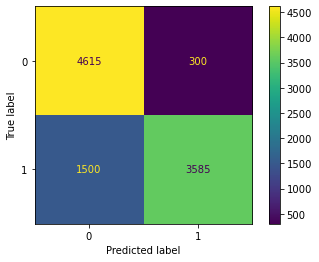

In [34]:
cm = confusion_matrix(df['y_true'], df['y_pred1'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();

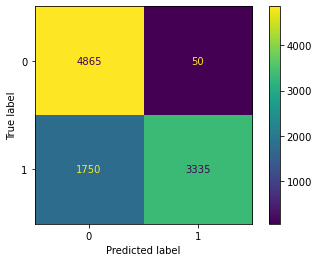

In [35]:
cm = confusion_matrix(df['y_true'], df['y_pred2'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();

In [36]:
confusion_matrix(df['y_true'], df['y_pred2'])

array([[4865,   50],
       [1750, 3335]], dtype=int64)

In [37]:
tn, fp, fn, tp = confusion_matrix(df['y_true'], df['y_pred2']).ravel()

In [38]:
tn, fp, fn, tp

(4865, 50, 1750, 3335)

In [39]:
# Sensitivity
tp / (tp + fn)

0.655850540806293

## Pregnancy test

In [40]:
! gdown 1T-nWdDdnjNWHjuwHvFaTQqlQ8ewz9hYI

Downloading...
From: https://drive.google.com/uc?id=1T-nWdDdnjNWHjuwHvFaTQqlQ8ewz9hYI
To: C:\Users\Анна\pregnancy.csv

  0%|          | 0.00/60.0k [00:00<?, ?B/s]
100%|##########| 60.0k/60.0k [00:00<00:00, 2.97MB/s]


In [41]:
df = pd.read_csv(r'C:\Users\Анна\pregnancy.csv')

In [42]:
df.head()

,y_true,y_pred1,y_pred2
0,0,0,0
1,1,1,1
2,1,1,1
3,0,1,0
4,1,1,1


In [50]:
len(df[df['y_true'] != df['y_pred1']])

500

In [47]:
# Accuracy for test1
(df['y_true'] == df['y_pred1']).mean()

0.95

In [51]:
# Accuracy for test2
(df['y_true'] == df['y_pred2']).mean()

0.95

In [52]:
tn, fp, fn, tp = confusion_matrix(df['y_true'], df['y_pred1']).ravel()

In [54]:
recall_score(df['y_true'],df['y_pred1'])

0.9901671583087512

In [55]:
recall_score(df['y_true'],df['y_pred1'],pos_label=0)

0.9084435401831129

In [53]:
# Sensitivity
tp / (tp + fn)

0.9901671583087512

In [57]:
# Specificity
tn / (tn + fp)

0.9084435401831129

In [58]:
tn, fp, fn, tp = confusion_matrix(df['y_true'], df['y_pred2']).ravel()

In [59]:
# Sensitivity
tp / (tp + fn)

0.9508357915437562

In [60]:
# Specificity
tn / (tn + fp)

0.9491353001017294

In [62]:
df['accuracy1'] = df['y_true'] == df['y_pred1']
df['accuracy2'] = df['y_true'] == df['y_pred2']

In [65]:
df.groupby('y_true')['accuracy1', 'accuracy2'].mean()

C:\Users\Анна\AppData\Local\Temp\ipykernel_42352\1358933137.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('y_true')['accuracy1', 'accuracy2'].mean()


,accuracy1,accuracy2
y_true,,
0,0.908444,0.949135
1,0.990167,0.950836


## Случайные числа

In [30]:
np.mean(np.random.binomial(1, 0.03, size=10))

0.0

In [34]:
a = np.random.binomial(1, 0.03, size=1000).mean()
b = np.random.binomial(1, 0.05, size=1000).mean()

In [35]:
a, b

(0.028, 0.046)

In [36]:
n = 1000
res = []
for i in range(n):
    a = np.random.binomial(1, 0.03, size=1000).mean()
    b = np.random.binomial(1, 0.05, size=1000).mean()
    res.append((a, b))

In [38]:
df = pd.DataFrame(res)
df.columns = ['a', 'b']

In [41]:
df.query('a > b')

,a,b
132,0.037,0.035
567,0.045,0.035
678,0.044,0.040
699,0.037,0.034
847,0.039,0.037
881,0.038,0.036
955,0.046,0.044
982,0.039,0.037


In [42]:
a = np.random.binomial(1, 0.03, size=1484).mean()
b = np.random.binomial(1, 0.05, size=1484).mean()

In [43]:
a, b

(0.03706199460916442, 0.04986522911051213)

In [44]:
a*1484, b*1484

(55.0, 74.0)

In [47]:
a = np.random.binomial(1484, 0.03)
b = np.random.binomial(1484, 0.05)

In [48]:
a, b

(50, 56)

In [49]:
a = np.random.binomial(1484, 0.03)
b = np.random.binomial(1484, 0.05)
a, b

(46, 70)

In [50]:
from statsmodels.stats.proportion import proportions_ztest

In [51]:
def test(conv_a,conv_b,size_a,size_b,significance=0.05):
  _, p_value = proportions_ztest([conv_a, conv_b],
                                 [size_a, size_b],
                                 alternative='two-sided')
  return p_value < significance

In [52]:
test(49,52,1484,1484)

False

In [53]:
test(44,78,1484,1484)

True

## TPR

In [69]:
n = 10000
res = []
for _ in range(n):
    a = np.random.binomial(1484, 0.03)
    b = np.random.binomial(1484, 0.05)
    res.append((a, b))

In [70]:
df = pd.DataFrame(res, columns = ['a', 'b'])

In [71]:
df['test'] = df.apply(lambda x: test(x['a'], x['b'], 1484, 1484), axis=1)

In [72]:
df['test'].mean()

0.8001

## FPR

In [73]:
from tqdm.notebook import tqdm

In [76]:
from tqdm import tqdm

In [77]:
tqdm.pandas()

In [83]:
n = 100000
res = []
for _ in tqdm(range(n)):
    a = np.random.binomial(1484, 0.03)
    b = np.random.binomial(1484, 0.03)
    res.append((a, b))

100%|██████████████████████████████████████████████████████████████████████| 100000/100000 [00:00<00:00, 228790.24it/s]


In [84]:
df = pd.DataFrame(res, columns = ['a', 'b'])

In [85]:
df['test'] = df.progress_apply(lambda row: test(row['a'],row['b'],1484,1484),axis=1)

100%|███████████████████████████████████████████████████████████████████████| 100000/100000 [00:09<00:00, 10022.99it/s]


In [86]:
df['test'].mean()

0.05139

## MDE

In [99]:
n = 10000
res = []
for _ in tqdm(range(n)):
    a = np.random.binomial(1484, 0.03)
    b = np.random.binomial(1484, 0.048)
    res.append((a, b))

100%|████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 227695.15it/s]


In [100]:
df = pd.DataFrame(res, columns = ['a', 'b'])

In [101]:
df['test'] = df.progress_apply(lambda row: test(row['a'],row['b'],1484,1484),axis=1)

100%|█████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 10081.74it/s]


In [102]:
df['test'].mean()

0.7282

## Проверяем калькулятор Evan Miller

### TPR

In [103]:
n = 100000
res = []
for _ in tqdm(range(n)):
    a = np.random.binomial(1609, 0.04)
    b = np.random.binomial(1609, 0.06)
    res.append((a, b))

100%|██████████████████████████████████████████████████████████████████████| 100000/100000 [00:00<00:00, 232011.89it/s]


In [104]:
df = pd.DataFrame(res, columns = ['a', 'b'])

In [105]:
df['test'] = df.progress_apply(lambda row: test(row['a'],row['b'],1609,1609),axis=1)

100%|███████████████████████████████████████████████████████████████████████| 100000/100000 [00:09<00:00, 10179.42it/s]


In [106]:
df['test'].mean()

0.74387

### FPR

In [107]:
n = 100000
res = []
for _ in tqdm(range(n)):
    a = np.random.binomial(1609, 0.04)
    b = np.random.binomial(1609, 0.04)
    res.append((a, b))

100%|██████████████████████████████████████████████████████████████████████| 100000/100000 [00:00<00:00, 227009.95it/s]


In [108]:
df = pd.DataFrame(res, columns = ['a', 'b'])

In [109]:
df['test'] = df.progress_apply(lambda row: test(row['a'],row['b'],1609,1609),axis=1)

100%|███████████████████████████████████████████████████████████████████████| 100000/100000 [00:09<00:00, 10032.43it/s]


In [110]:
df['test'].mean()

0.04955

### MDE

In [147]:
n = 100000
res = []
for _ in tqdm(range(n)):
    a = np.random.binomial(1830, 0.04)
    b = np.random.binomial(1830, 0.06)
    res.append((a, b))

100%|██████████████████████████████████████████████████████████████████████| 100000/100000 [00:00<00:00, 231270.67it/s]


In [148]:
df = pd.DataFrame(res, columns = ['a', 'b'])

In [149]:
df['test'] = df.progress_apply(lambda row: test(row['a'],row['b'],1609,1609),axis=1)

100%|███████████████████████████████████████████████████████████████████████| 100000/100000 [00:09<00:00, 10145.20it/s]


In [150]:
df['test'].mean()

0.79643

## Sample sizes in Python

In [151]:
from statsmodels.stats.power import NormalIndPower
import statsmodels.api as sm

baseline = 0.03
mde = 0.02
ratio = 1
power = 0.8
alpha = 0.05

analysis = NormalIndPower()

effect_size = sm.stats.proportion_effectsize(baseline, baseline + mde)

result = analysis.solve_power(effect_size=effect_size, power=power, alpha=alpha, ratio=ratio, alternative='two-sided')
sample_size = int(np.ceil(result))

sample_size, sample_size*ratio

(1484, 1484)